In [1]:
# Importação das bilbiotecas

from pandas import read_csv, DataFrame, Series # Leitura de Dados, Criação de DataFrames
from seaborn import heatmap # Plotagem de mapas de calor
from matplotlib.colors import LinearSegmentedColormap # Manipulação de paletas de cores em gráficos
import matplotlib.pyplot as plt # Visualização de dados
import numpy as np # Operações matemáticas

In [2]:
# Caminho dos Dados para EDA
data_path = r'..\data\dados_processados\liver_cirrhosis_v1.csv'

In [3]:
# Lendo os Dados
df = read_csv(data_path)

Parte Pedro:

### Aqui, não utilizo a última coluna, que seria a de estágio, pois ela se caracteriza como categórica

In [4]:
# Colunas numéricas
colunas_numericas = list(df.select_dtypes('number'))[:-1] #Estágio se caracteriza como categórica
colunas_numericas

['Numero_dias',
 'Idade',
 'Bilirrubina(mg/dl)',
 'Colesterol(mg/dl)',
 'Albumina(gm/dl)',
 'Cobre_Urina(ug/dia)',
 'Fosfatase_Alcalina (U/L)',
 'Aspartato_Aminotransferase(U/L)',
 'Triglicerídeos(mg/dl)',
 'Plaquetas(ml/1000)',
 'Tempo_de_Protrombina(s)']

Como a idade dos pacientes está disposta em dias, é preciso convertê-las para ano.

In [5]:
# Convertendo dias para anos
df['Idade_ano'] = (df['Idade']/365).astype(int)
df['Idade_ano']

0       50
1       54
2       32
3       45
4       59
        ..
9632    49
9633    64
9634    67
9635    58
9636    78
Name: Idade_ano, Length: 9637, dtype: int32

In [6]:
# Atualizando colunas numéricas
df.drop('Idade', axis=1, inplace=True)
colunas_numericas.remove('Idade')
colunas_numericas.append('Idade_ano')

### **Descrição geral dos dados**

O método `.describe()` retorna estatísticas gerais das colunas numéricas. São elas:

* **média (mean):** A média da variável
* **desvio padrão (std):** Desvio padrão da varíavel
* **valor mínimo (min):** Valor mínimo encontrado da variável 
* **primeiro quartil (25%)**: Indica que 25% dos dados estão abaixo do valor indicado
* **segundo quartil (50%)**: Indica que 50% dos dados estão abaixo do valor indicado
* **terceiro quartil (75%)**: Indica que 75% dos dados estão abaixo do valor indicado
* **valor máximo (max)**: Valor máximo encontrado da variável

In [7]:
#Estatísticas gerais

"""
Coluna count foi removida pois 
essa estatística não é adequada para variáveis numéricas
"""

display(df[colunas_numericas].describe().drop('count', axis=0))

,Numero_dias,Bilirrubina(mg/dl),Colesterol(mg/dl),Albumina(gm/dl),Cobre_Urina(ug/dia),Fosfatase_Alcalina (U/L),Aspartato_Aminotransferase(U/L),Triglicerídeos(mg/dl),Plaquetas(ml/1000),Tempo_de_Protrombina(s),Idade_ano
mean,1911.276123,3.228598,371.721588,3.496127,97.025914,1973.608523,122.309516,123.597732,253.791919,10.713237,50.118605
std,1093.543838,4.512662,197.841842,0.382358,73.116315,1827.226621,47.639241,55.206737,95.749689,0.922098,10.162490
min,41.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,26.000000
25%,1103.000000,0.800000,271.000000,3.290000,51.000000,1031.000000,89.900000,93.000000,188.000000,10.000000,42.000000
50%,1690.000000,1.300000,369.510563,3.520000,97.648387,1713.000000,122.556346,124.702128,249.000000,10.600000,51.000000
75%,2598.000000,3.300000,369.510563,3.760000,102.000000,1982.655769,134.850000,125.000000,307.000000,11.100000,57.000000
max,4795.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,78.000000


## **Visualização de Dados:**

#### **Aqui, vou criar funções de plotagem para tornar o processo mais prático ao longo da EDA**

In [8]:
# Função para plotar bloxplots ao longo da EDA

def plot_boxplots(df: DataFrame = None, serie_categoria:Series = None, serie_alvo:Series = None, min: int=0, max: int=0, legend: bool = True):

    fig, ax = plt.subplots()
    ax2 = ax.twinx()

    if (df is not None) and (serie_categoria is None) or (serie_alvo is None):
        ax.boxplot(
        df,
        labels = df.columns,
        vert=False
        )
        return ax
    
    else:
        
        if ((min != 0) and (max != 0)):
            ax2.axvspan(               
                xmin=min,
                xmax=max,
                color='lightgreen',
                alpha=0.25, 
                label=f'Intervalo Adequado ({min}-{max})'
                )
            if legend:
                plt.legend()
            
        ax2.set_yticklabels([])
        ax2.set_ylim(ax.get_ylim())
    
        if (serie_categoria is None) or (serie_categoria.empty):
            ax.boxplot(
                serie_alvo,
                labels=[serie_alvo.name],
                vert=False
            )
            plt.title(f'Distribuição de {serie_alvo.name}')
    
            return ax
    
        categoria_name = serie_categoria.name
        alvo_name = serie_alvo.name
        map = {categoria: i for i, categoria in enumerate(serie_categoria.unique())}
    
        for categoria in serie_categoria.unique():
            ax.boxplot(
                df[df[categoria_name] == categoria][alvo_name],
                positions=[map[categoria]],
                labels=[categoria],
                vert=False
            )
            
        plt.title(f'Distribuição de {alvo_name} por {categoria_name}')
    
        return ax

In [9]:
# Função para plotar histogramas ao longo da EDA

def plot_histogramas(serie_alvo: Series, min: int = 0, max: int = 0, bins: int = 20):
    
    fig, ax = plt.subplots()
    ax.hist(serie_alvo, bins=bins, edgecolor='black', color='#1b2442')

    if ((min != 0) and (max != 0)):
        ax.axvspan(               
            xmin=min,
            xmax=max,
            color='lightgreen',
            alpha=0.25, 
            label=f'Intervalo Adequado ({min}-{max})'
            )
        plt.legend()
    
    plt.title(f'Distribuição da frequência de {serie_alvo.name}')

    return ax

### **Boxplot´s**

O que é um boxplot?

Um boxplot é um modelo de gráfico para 
analisar o resumo da distribuição
estatística de uma variável.

**Características**
* A linha central representa a mediana
* A caixa inferior é o 1º quartil e a superior é o 3º quartil
* A linha inferior é o limite inferior (valor mínimo)
* A linha superior é o limite superior, mas não o valor máximo
* Os pontos além da linha superior ou abaixo da inferior são outliers

##### **EXEMPLO:**

<Axes: >

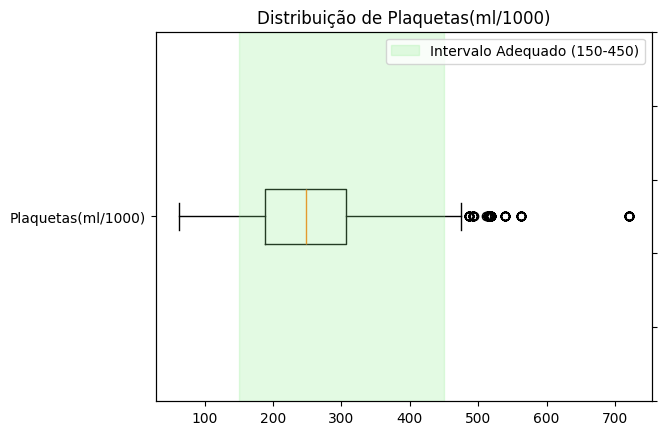

In [10]:
min_plaquetas = 150
max_plaquetas = 450
plot_boxplots(serie_alvo=df['Plaquetas(ml/1000)'], min=min_plaquetas, max=max_plaquetas)

"O valor normal da contagem de plaquetas no sangue varia de 150.000 a 450.000 plaquetas por microlitro de sangue."

<u><a href="https://www.tuasaude.com/medico-responde/valor-normal-de-plaquetas/">FONTE</a></u>

### **Histogramas**

Um histograma é um tipo de gráfico que mostra a distribuição de uma variável contínua. Ele agrupa os dados em intervalos (bins) e conta a frequência de valores que caem em cada intervalo.

**Características**
* **Barras Verticais:** Cada barra representa um intervalo de valores (bin). A altura da barra indica a frequência (ou contagem) dos valores nesse intervalo.

* **Eixo X (Horizontal):** Mostra os intervalos de valores (bins) da variável contínua.

* **Eixo Y (Vertical):** Mostra a frequência (contagem) de valores em cada intervalo.

* **Tamanho dos Intervalos (Bins):** O número de bins pode ser ajustado para mudar a granularidade do histograma. Mais bins fornecem mais detalhes, enquanto menos bins dão uma visão mais geral.

* **Forma da Distribuição:** A forma do histograma (simétrica, enviesada à direita/esquerda, etc.) pode dar insights sobre a distribuição dos dados.

* **Áreas de Frequência Alta e Baixa:** Áreas onde as barras são altas indicam alta frequência de valores, enquanto áreas com barras baixas indicam baixa frequência.


##### **EXEMPLO:**

<Axes: title={'center': 'Distribuição da frequência de Colesterol(mg/dl)'}>

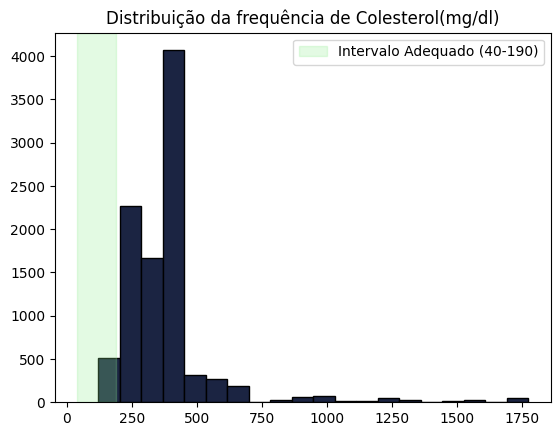

In [11]:
min_hdl = 40
max_total = 190
plot_histogramas(serie_alvo=df['Colesterol(mg/dl)'], min=min_hdl, max=max_total)

**Valor de referência para adultos maiores de 20 anos:**

"O valor de colesterol total (inclui LDL e HDL) geralmente é considerado normal quando abaixo de 190 mg/dL"

"Para colesterol HDL, o valor considerado ideal é acima de 40mg/dl"

<u><a href="https://www.tuasaude.com/valores-de-referencia-para-o-colesterol/">FONTE</a></u>

### Plotando boxplot para analisar a distribuição das variáveis e existência de outliers

Text(0.5, 1.0, 'Distribuição das variáveis numéricas')

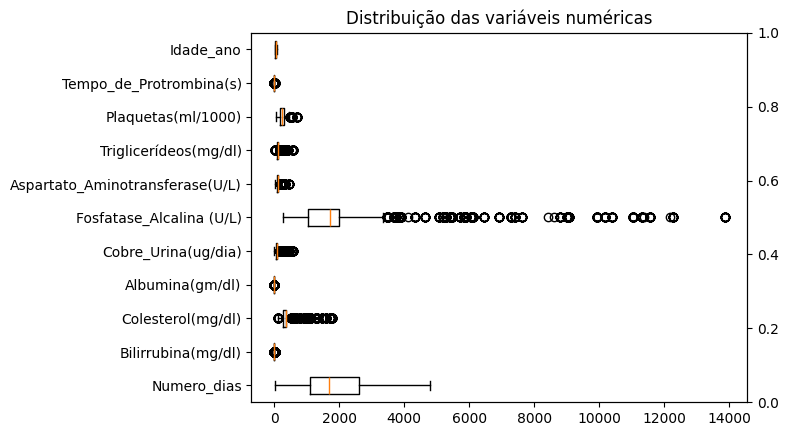

In [12]:
plot_boxplots(df=df[colunas_numericas])
plt.title('Distribuição das variáveis numéricas')

<b><span style='color:red'>Perceba que pela discrepância de amplitude dos dados devido às variáveis serem medidas de maneiras diferentes e a existência de muitas delas,
a EDA de todas tornaria o processo bastante extenso. Por isso, definimos
com base em suas importâncias para avaliação de um quadro
de cirrose, as seguintes variáveis.</span></b>

<ul style='color:white'><b>
    <li>Fosfatase alcalina</li>
    <li>Albumina</li>
    <li>Tempo de protombina</li>
</b></ul>

### **Análise da Fosfatase alcalina**

<Axes: >

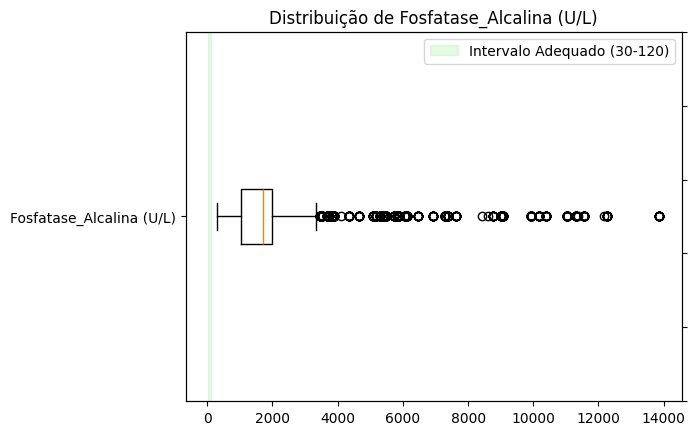

In [13]:
# Análise com Boxplots
min_fosfatase = 30
max_fosfatase = 120
plot_boxplots(serie_alvo=df['Fosfatase_Alcalina (U/L)'], min=min_fosfatase,max=max_fosfatase)

### **Investigando a distribuição os Estágios**

A existência de muitos outliers e nenhum valor dentro da faixa adequada nos levou a investigar mais afundo aonde acontece a concentração de fosfatase em cada estágio.

In [14]:
# Função para plotar as faixas dos estágios

def plotar_faixa(df: DataFrame, ax):

    cores = ['#1b2442', '#b02238', '#7992a4'] # cores para cada estágio

    for i, estagio in enumerate(df['Estágio'].unique()):
        data = df.query(f'Estágio == @estagio') # dataframe filtrado por estágio
        range_min = np.percentile(data['Fosfatase_Alcalina (U/L)'], 25) # primeiro percentil
        range_max = np.percentile(data['Fosfatase_Alcalina (U/L)'], 75) # terceiro percentil

        ax.axvspan(
            xmin=range_min,
            xmax=range_max,
            color=cores[i],
            alpha=0.5, 
            label=f'Concentração do Estágio {estagio}: ({range_min:.2f} - {range_max:.2f})'
            )
        
    return ax

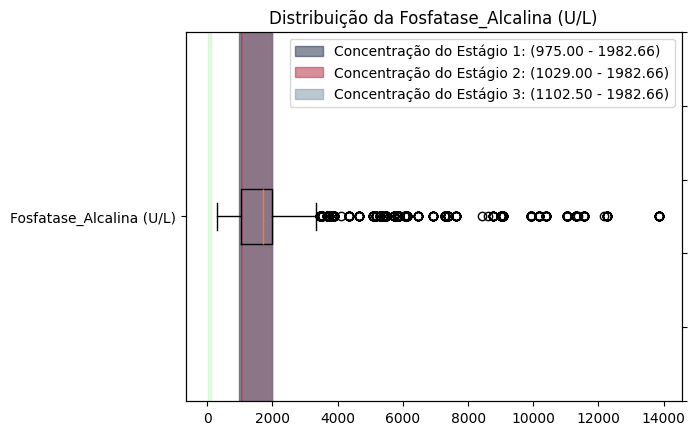

In [15]:
# Análise com Boxplot com concentração de dados por Estágio
ax = plot_boxplots(serie_alvo=df['Fosfatase_Alcalina (U/L)'], min=min_fosfatase, max=max_fosfatase,legend=False)
ax2 = plotar_faixa(df=df, ax=ax)
ax2.legend()
plt.title(f'Distribuição da {df['Fosfatase_Alcalina (U/L)'].name}')
plt.show()

Em geral, o intervalo de referência para adultos no exame de fosfatase alcalina é de 30 a 120 U/L (unidades por litro).  

<u><a href="https://nav.dasa.com.br/blog/fosfatase-alcalina">FONTE</a></u>

#### <b>Perceba que, o terceiro percentil para todos os estágios é exatamente o mesmo.</b>

Além disso, essa é a variável que mais possui outliers registrados.
Isso fica claro quando comparado com as outras, no gráfico anterior, e por algum motivo, não há nenhum paciente que se encontra no intervalo adequado.

**Tal fato nos levou a investigar isso de maneira mais profunda, e analisar os valores máximos e mínimos da fosfatase alcalina para cada estágio.**


In [16]:
for estagio in df['Estágio'].unique():
    data = df.query('Estágio == @estagio') # Dados filtrados pelo estágio da rodada
    max = data['Fosfatase_Alcalina (U/L)'].max() # Valor máximo de fosfatase do estágio da rodada
    min = data['Fosfatase_Alcalina (U/L)'].min() # Valor máximo de fosfatase do estágio da rodada
    size_max = len(data[data['Fosfatase_Alcalina (U/L)'] == max]) # Tamanho dos dados em que a fosfatase possui valor máximo
    size_min = len(data[data['Fosfatase_Alcalina (U/L)'] == min]) # Tamanho dos dados em que a fosfatase possui valor mínimo
    print(f'========= ESTÁGIO {estagio} =========')
    print(f'Máx: {max:.2f} / Tamanho filtrado pelo Máx: {size_max}')
    print(f'Min: {min:.2f} / Tamanho filtrado pelo Min: {size_min}\n')

========= ESTÁGIO 1 =========
Máx: 13862.40 / Tamanho filtrado pelo Máx: 11
Min: 289.00 / Tamanho filtrado pelo Min: 2

========= ESTÁGIO 2 =========
Máx: 13862.40 / Tamanho filtrado pelo Máx: 3
Min: 289.00 / Tamanho filtrado pelo Min: 6

========= ESTÁGIO 3 =========
Máx: 13862.40 / Tamanho filtrado pelo Máx: 4
Min: 289.00 / Tamanho filtrado pelo Min: 1



#### **Testando dropando os valores máximos**

In [17]:
for estagio in df['Estágio'].unique():
    data = df.query('Estágio == @estagio') # Dados filtrados pelo estágio da rodada
    max = data['Fosfatase_Alcalina (U/L)'].max() # Valor máximo de fosfatase do estágio da rodada
    min = data['Fosfatase_Alcalina (U/L)'].min() # Valor máximo de fosfatase do estágio da rodada
    data = df[(df['Fosfatase_Alcalina (U/L)'] != max) & (df['Fosfatase_Alcalina (U/L)'] != min)] # Filtrando a tabela em que a fosfatase não possui os valores acima
    new_max = data['Fosfatase_Alcalina (U/L)'].max() # Valor máximo de fosfatase do estágio da rodada
    new_min = data['Fosfatase_Alcalina (U/L)'].min()
    size_max = len(data[data['Fosfatase_Alcalina (U/L)'] == new_max]) # Tamanho dos dados em que a fosfatase possui valor máximo
    size_min = len(data[data['Fosfatase_Alcalina (U/L)'] == new_min]) # Tamanho dos dados em que a fosfatase possui valor mínimo
    print(f'========= ESTÁGIO {estagio} =========')
    print(f'Máx: {new_max:.2f} / Tamanho filtrado pelo Máx: {size_max}')
    print(f'Min: {new_min:.2f} / Tamanho filtrado pelo Min: {size_min}\n')

========= ESTÁGIO 1 =========
Máx: 12258.80 / Tamanho filtrado pelo Máx: 16
Min: 310.00 / Tamanho filtrado pelo Min: 39

========= ESTÁGIO 2 =========
Máx: 12258.80 / Tamanho filtrado pelo Máx: 16
Min: 310.00 / Tamanho filtrado pelo Min: 39

========= ESTÁGIO 3 =========
Máx: 12258.80 / Tamanho filtrado pelo Máx: 16
Min: 310.00 / Tamanho filtrado pelo Min: 39



##### **Perceba que, assim como terceiro percentil, para cada estágio os valores máximos e mínimos são exatamente os mesmos e se repetem no mesmo estágio.**

<b><span style = "color:red">Isso pode ser explicado pelo fato de que parte dos dados da base foram gerados de maneira sintética.</span></b>

Para analisar isso em uma escala maior, criarei uma função onde esse processo de filtragem dos dados retirando os valores máximos e mínimos atuais e contabilizando a frequência dos valores novos em rodadas para analisar o comportamento desses valores.

In [6]:
def frequency(df: DataFrame, rounds: int) -> DataFrame:
    list_size_min = []
    list_size_max = []
    valor_min = []
    valor_max = []
    rodadas = []
    
    for i in range(rounds):
        max = df['Fosfatase_Alcalina (U/L)'].max()
        min = df['Fosfatase_Alcalina (U/L)'].min()
        len_min = len(df[df['Fosfatase_Alcalina (U/L)'] == min])
        len_max = len(df[df['Fosfatase_Alcalina (U/L)'] == max])
        list_size_min.append(len_min)
        list_size_max.append(len_max)
        valor_min.append(min)
        valor_max.append(max)
        rodadas.append(i)
        df = df[(df['Fosfatase_Alcalina (U/L)'] != max) & (df['Fosfatase_Alcalina (U/L)'] != min)]

    return DataFrame({
        'Rodada':rodadas,
        'Valor Mínimo':valor_min,
        'Frequência min':list_size_min,
        'Valor Máximo':valor_max,
        'Frequência max':list_size_max,
    })

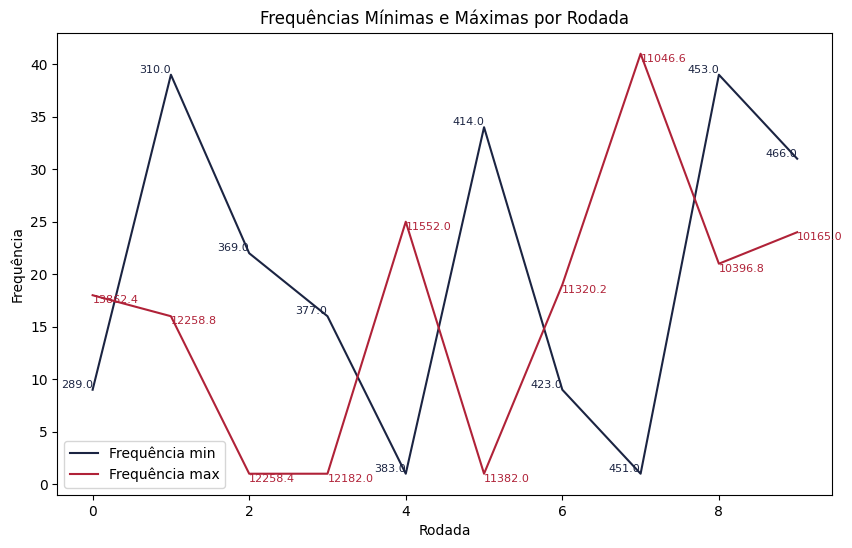

In [7]:
df_frequency = frequency(df, 10)

plt.figure(figsize=(10,6))
plt.plot(df_frequency['Rodada'], df_frequency['Frequência min'], label='Frequência min', color='#1b2442')
plt.plot(df_frequency['Rodada'], df_frequency['Frequência max'], label='Frequência max', color='#b02238')
plt.title('Frequências Mínimas e Máximas por Rodada')
plt.xlabel('Rodada')
plt.ylabel('Frequência')
plt.legend()
for i in range(len(df_frequency)):
    plt.text(
        df_frequency['Rodada'][i], df_frequency['Frequência min'][i], 
        f'{df_frequency["Valor Mínimo"][i]:.1f}', 
        ha='right', 
        va='bottom', 
        color='#1b2442',
        fontsize=8
        )
    plt.text(
        df_frequency['Rodada'][i], df_frequency['Frequência max'][i], 
        f'{df_frequency["Valor Máximo"][i]:.1f}', 
        ha='left', 
        va='top', 
        color='#b02238', 
        fontsize=8
        )

plt.show()

Perceba que, ao diminuir a frequência de um valor mínimo, a de um valor máximo aumenta, e vice versa.

<Axes: title={'center': 'Distribuição da frequência de Fosfatase_Alcalina (U/L)'}>

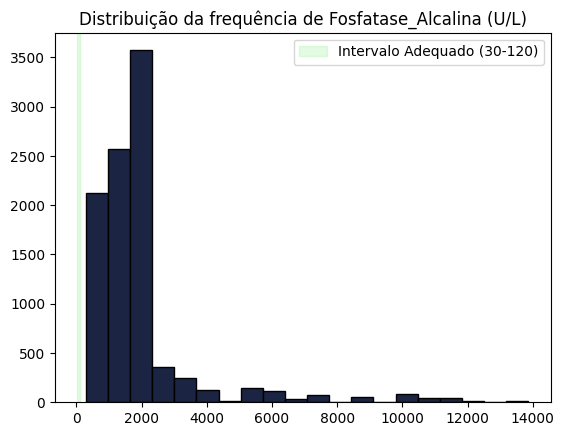

In [20]:
# Análises com histogramas
plot_histogramas(serie_alvo=df['Fosfatase_Alcalina (U/L)'],min=30, max=120)

Perceba que essa variável é enviesada para a esquerda.

### **Análise da Albumina**

<Axes: >

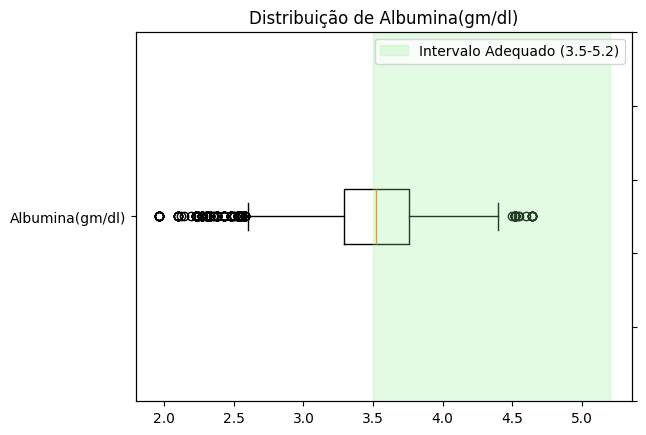

In [21]:
# Análise com Boxplot
min_albumina = 3.5
max_albumina = 5.2
plot_boxplots(serie_alvo=df['Albumina(gm/dl)'], min=min_albumina,max=max_albumina)

"O valor ideal de Albumina (gm/dl) para pessoas de 19 - 60 anos é de 3.50 – 5.20 g/dL"

<u><a hre = "https://cedirlab.com.br/exames-vacinas/exames/albumina/">FONTE</a></u>

<Axes: title={'center': 'Distribuição da frequência de Albumina(gm/dl)'}>

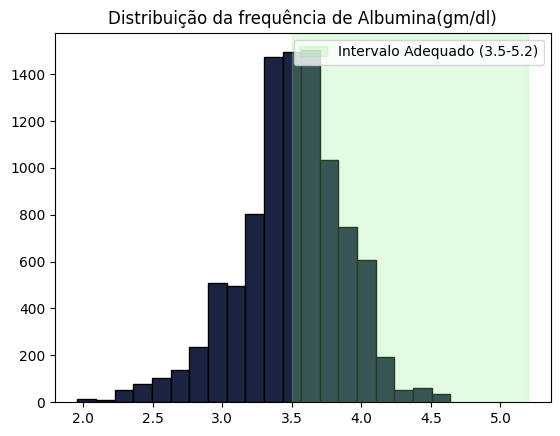

In [22]:
# Análises com histogramas
plot_histogramas(serie_alvo=df['Albumina(gm/dl)'], min=min_albumina, max=max_albumina)

Já essa, possui uma distribuição mais normalizada., porém cerca de metade dos pacientes não está no intervalo adequado.

### **Tempo de protombina**

<Axes: >

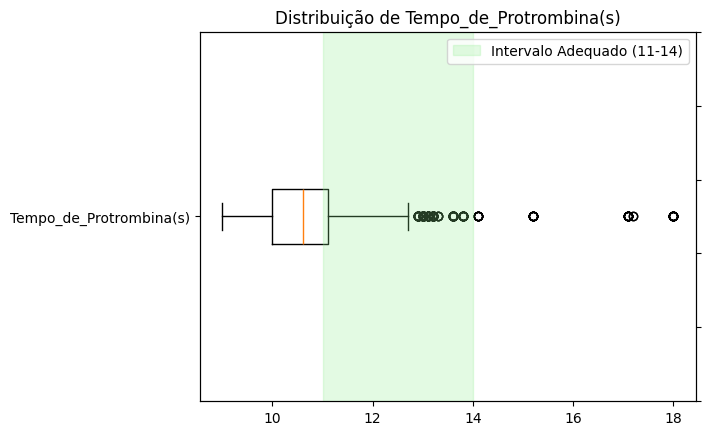

In [23]:
# Análise com Boxplots
min_protombina = 11
max_protombina= 14
plot_boxplots(serie_alvo=df['Tempo_de_Protrombina(s)'],min=min_protombina,max=max_protombina)

"O valor de referência do tempo de protrombina varia de acordo com o laboratório. No entanto, em geral, o valor aceito como normal é de 11 a 14 segundos, com atividade de protrombina maior que 70%."

<u><a href = "https://nav.dasa.com.br/blog/tempo-de-protrombina">FONTE</a></u>

<Axes: title={'center': 'Distribuição da frequência de Tempo_de_Protrombina(s)'}>

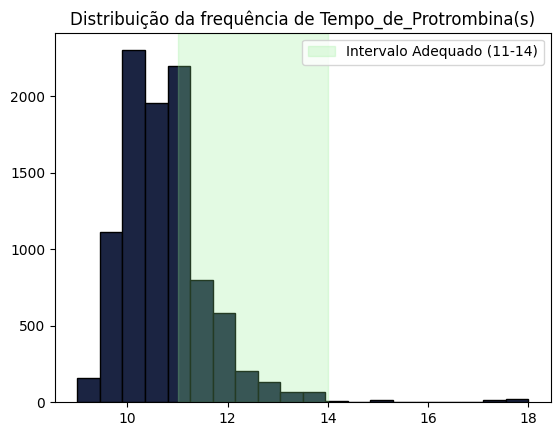

In [24]:
# Análise com Histogramas
plot_histogramas(serie_alvo=df['Tempo_de_Protrombina(s)'], min=min_protombina, max=max_protombina)

### **Analisando Idades**

A análise das idades é de extrema importância para identificar qualquer tipo de viés nos dados. É a melhor coluna dos dados numéricos para analisar a distribuição dos pacientes.

Por exemplo, se percebemos uma frequência maior de pessoas mais novas, percebemos que os dados estão enviesados, pois é de censo comum que cirrose geralmente acomete pessoas mais velhas.

<Axes: >

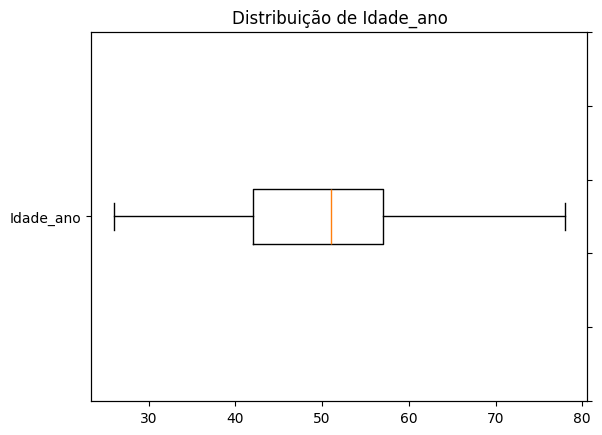

In [25]:
# Análise com Boxplots
plot_boxplots(serie_alvo=df['Idade_ano'])

Perceba que os dados estão bem distribuídos não há nenhum outlier identificado, mostrando uma boa consistência.

<Axes: title={'center': 'Distribuição da frequência de Idade_ano'}>

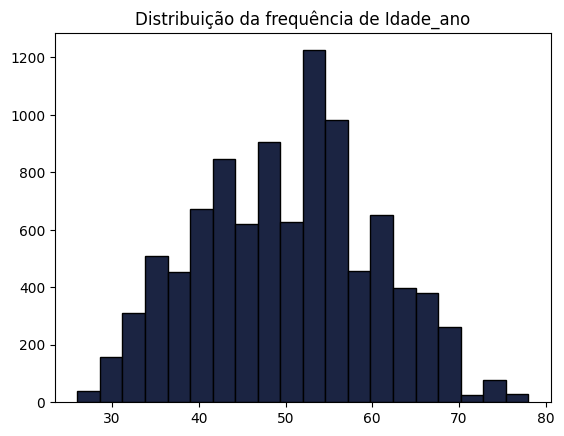

In [26]:
# Análise com Histogramas

plot_histogramas(serie_alvo=df['Idade_ano'])

Mais uma vez, outra maneira de visualizar a distribuição dos dados, e perceba que eles são normalmente distribuídos.

### **Investigando correlações**

Correlação consiste na interação entre duas variáveis, ou seja, se eu quero investigar a correlação entre duas variáveis, devo analisar como uma se comporta em função da outra, para descobrir se elas se influenciam.

Os tipos de correlações podem ser:

* Direta (Uma sobe, outra também sobe)
* Indireta (Uma sobe, outra desce)

Além disso é possível medir a força dessas correlações, ou seja, metrificar o quanto elas se relacionam. Para isso, calculamos o coeficente de correlação, que varia de -1 a 1. Quanto mais próximo de uma das extremidades mais a correlação é forte, caso o contrário, é fraca. Coeficientes negativos são correlações indiretas e positivos são correlações diretas.

In [27]:
# Calculando a correlação entre as variáveis

"""O método .corr() retorna uma matriz com os coeficientes
de correlação das variáveis."""

df[colunas_numericas].corr()

,Numero_dias,Bilirrubina(mg/dl),Colesterol(mg/dl),Albumina(gm/dl),Cobre_Urina(ug/dia),Fosfatase_Alcalina (U/L),Aspartato_Aminotransferase(U/L),Triglicerídeos(mg/dl),Plaquetas(ml/1000),Tempo_de_Protrombina(s),Idade_ano
Numero_dias,1.000000,-0.360158,-0.128592,0.356754,-0.282194,0.103289,-0.172729,-0.122716,0.076867,-0.095059,-0.041071
Bilirrubina(mg/dl),-0.360158,1.000000,0.352127,-0.261299,0.415027,0.132425,0.352460,0.348504,-0.057867,0.170697,0.032688
Colesterol(mg/dl),-0.128592,0.352127,1.000000,-0.062756,0.145983,0.117626,0.322665,0.267340,0.021653,0.002592,-0.017204
Albumina(gm/dl),0.356754,-0.261299,-0.062756,1.000000,-0.168683,-0.112587,-0.147348,-0.103031,0.107514,-0.156307,-0.079731
Cobre_Urina(ug/dia),-0.282194,0.415027,0.145983,-0.168683,1.000000,0.184010,0.285076,0.239766,-0.041500,0.101950,0.022662
Fosfatase_Alcalina (U/L),0.103289,0.132425,0.117626,-0.112587,0.184010,1.000000,0.137345,0.153644,0.010288,0.064008,0.019881
Aspartato_Aminotransferase(U/L),-0.172729,0.352460,0.322665,-0.147348,0.285076,0.137345,1.000000,0.119134,-0.037032,0.072822,-0.003902
Triglicerídeos(mg/dl),-0.122716,0.348504,0.267340,-0.103031,0.239766,0.153644,0.119134,1.000000,-0.009481,0.022054,0.024557
Plaquetas(ml/1000),0.076867,-0.057867,0.021653,0.107514,-0.041500,0.010288,-0.037032,-0.009481,1.000000,-0.129620,-0.112695
Tempo_de_Protrombina(s),-0.095059,0.170697,0.002592,-0.156307,0.101950,0.064008,0.072822,0.022054,-0.129620,1.000000,0.060620


### **Mapas de calor**

O que é um mapa de calor?

Um mapa de calor é uma representação gráfica de dados onde os valores são exibidos em uma matriz ou tabela e são representados por cores. É uma ferramenta eficaz para visualizar padrões, variâncias e correlações em conjuntos de dados complexos.

### **Características**

- **Cores**: As cores representam os valores dos dados. Geralmente, uma paleta de cores é usada para mostrar a intensidade dos valores, onde cores mais escuras ou mais quentes (vermelho, laranja) representam valores mais altos e cores mais claras ou mais frias (azul, verde) representam valores mais baixos.

- **Matriz**: O mapa de calor é organizado como uma matriz, onde cada célula da matriz corresponde a um valor de dados.

- **Eixos**: Os eixos do mapa de calor geralmente representam diferentes categorias ou dimensões dos dados.

- **Legenda**: Uma barra de cores ou legenda é frequentemente incluída para mostrar a escala de valores correspondentes às cores.


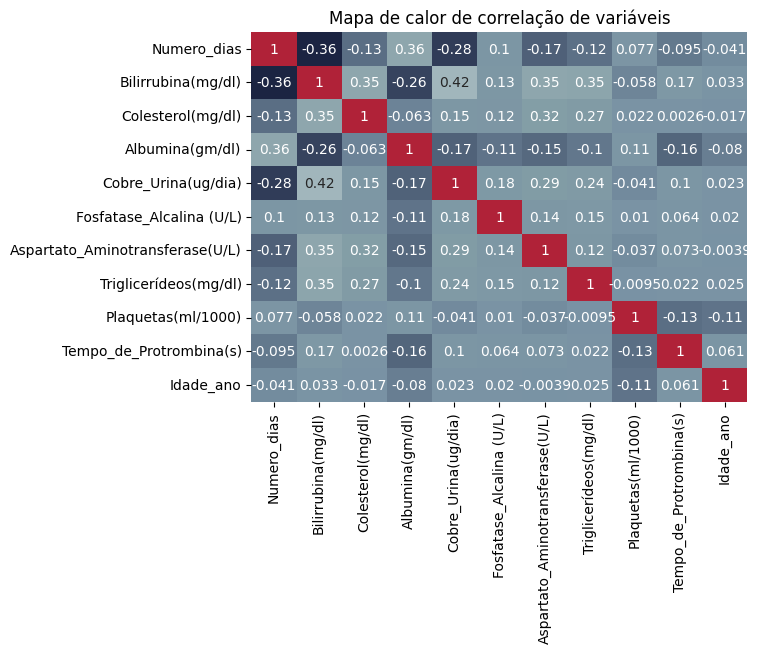

In [28]:
# EXEMPLO
colors = ["#1b2442","#7992a4","#829da5","#f4f7f7","#b02238"]
cmap = LinearSegmentedColormap.from_list("custom_palette", colors, N=256)
heatmap(
    df[colunas_numericas].corr(), # Matriz de correlações
    annot=True, # Escreve os valores dos coeficientes
    cmap=cmap, # Paleta de cores
    cbar=False # Desativa a legenda
    )
plt.title("Mapa de calor de correlação de variáveis")
plt.show()

A princípio, os dados não apresentaram nenhuma correlação forte, mas vou selecionar as top 3 mais correlacionadas para se aprofundar.

Porém, como há diferença de unidades de medida nas variáveis, há a possibilidade de que após uma normalização dos dados, seja possível calcular correlações mais fortes.

* Cobre na Urina X Bilirrubina
* Abulmina X Dias de tratamento
* Bilirrubina X Dias de tratamento

Perceba também que Abulmina e Bilirrubina se correlacionam com a mesma força em relaçao a Dias de tratamento, porém de maneira inversa.

### **Cobre na Urina X Bilirrubina**

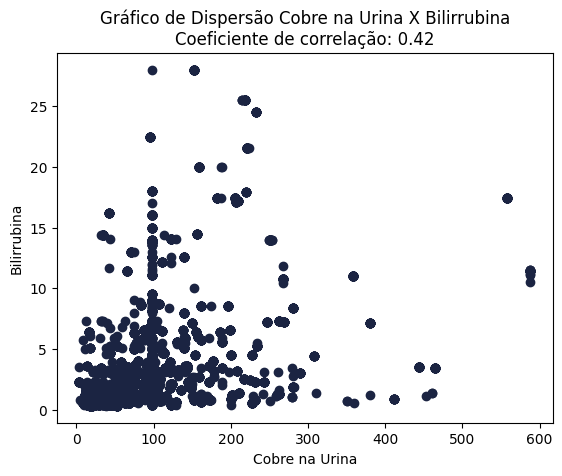

In [29]:
# Gráfico de Dispersão

plt.scatter(
    df['Cobre_Urina(ug/dia)'],
    df['Bilirrubina(mg/dl)'],
    color='#1b2442'
)

plt.title(
    'Gráfico de Dispersão Cobre na Urina X Bilirrubina\n'
    f'Coeficiente de correlação: {df['Cobre_Urina(ug/dia)'].corr(df['Bilirrubina(mg/dl)']):.2f}')
plt.xlabel('Cobre na Urina')
plt.ylabel('Bilirrubina')
plt.show()

Perceba que a dispersão dos dados aumenta linearmente, como um cone
Esse gráfico demonstra que há muita dispersão, logo é **NÃO** uma correlação forte

### **Abulmina X Dias de tratamento**

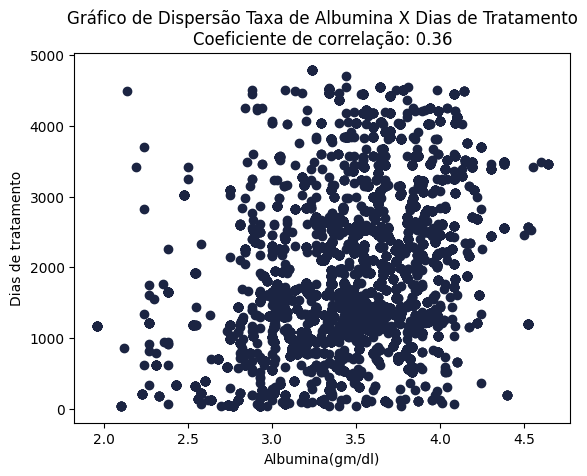

In [30]:
# Gráfico de Dispersão

plt.scatter(
    df['Albumina(gm/dl)'],
    df['Numero_dias'],
    color='#1b2442'
)

plt.title(
    'Gráfico de Dispersão Taxa de Albumina X Dias de Tratamento\n'
    f'Coeficiente de correlação: {df['Albumina(gm/dl)'].corr(df['Numero_dias']):.2f}')
plt.xlabel('Albumina(gm/dl)')
plt.ylabel('Dias de tratamento')
plt.show()

Como a outra correlação selecionada possui mesma força porém inversa, o gráfico será semelhante porém invertido

## **Testando Hipóteses**

### **Analisando a relação de Cobre na Urina por estágio**

<Axes: >

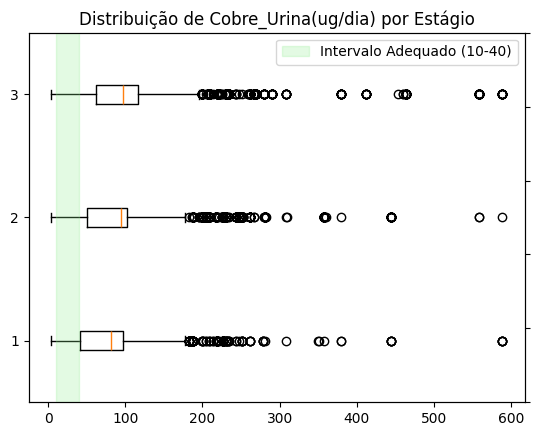

In [31]:
min_cobre = 10
max_cobre = 40
plot_boxplots(df=df,serie_categoria=df['Estágio'],serie_alvo=df['Cobre_Urina(ug/dia)'],min=min_cobre,max=40)

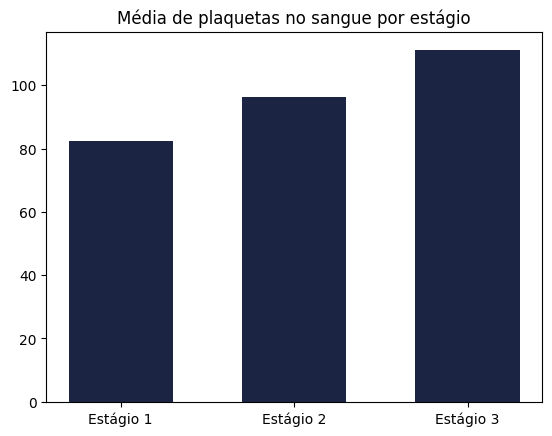

In [32]:
media_cobre_estagio = df.groupby('Estágio')['Cobre_Urina(ug/dia)'].mean().reset_index()
map = {
    1:'Estágio 1',
    2:'Estágio 2',
    3:'Estágio 3'
}
fig, ax = plt.subplots()
ax.bar(
    media_cobre_estagio['Estágio'].map(map), 
    media_cobre_estagio['Cobre_Urina(ug/dia)'],
    width=0.6,
    color="#1b2442"
)
plt.title('Média de cobre no sangue por estágio')
plt.show()

Perceba que o nível de cobre na urina aumenta conforme o estágio também, o que pode ser um agravador da doença.

### **Analisando relação entre Plaquetas por estágio e morte**

<Axes: >

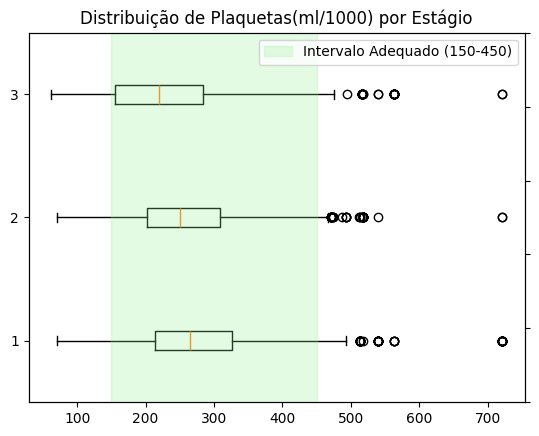

In [33]:
min_plaquetas = 150
max_plaquetas = 450
plot_boxplots(df=df,serie_categoria=df['Estágio'],serie_alvo=df['Plaquetas(ml/1000)'], min=min_plaquetas,max=max_plaquetas)

Apesar da maioria dos paciente do estágio 3 possuir uma taxa de plaquetas dentro do ideal, é o estágio com menor taxa.

### **Média de Plaquetas Estágio**

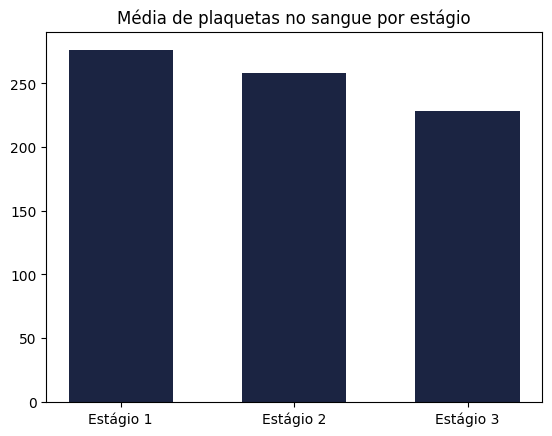

In [34]:
media_plaqueta_estagio = df.groupby('Estágio')['Plaquetas(ml/1000)'].mean().reset_index()
fig, ax = plt.subplots()
ax.bar(
    media_plaqueta_estagio['Estágio'].map(map), 
    media_plaqueta_estagio['Plaquetas(ml/1000)'],
    width=0.6,
    color='#1b2442'
)
plt.title('Média de plaquetas no sangue por estágio')
plt.show()

Perceba uma redução na taxa de plaquetas conforme a piora do estágio.

### **Distribuição de Plaquetas por fim de tratamento**

<Axes: >

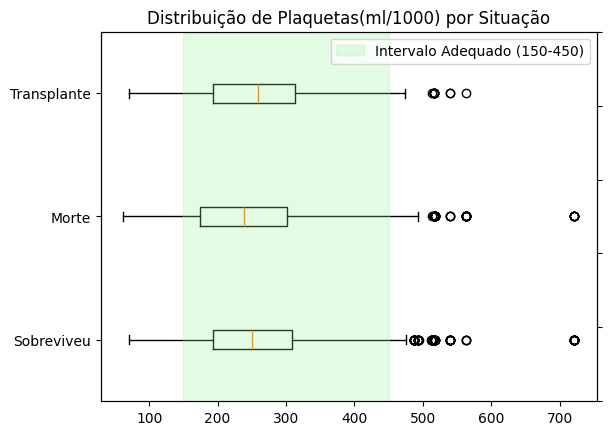

In [35]:
plot_boxplots(df=df,serie_categoria=df['Situação'],serie_alvo=df['Plaquetas(ml/1000)'],min=min_plaquetas,max=max_plaquetas)

A maioria dos pacientes encontra-se numa faixa de plaquetas adequada independente do fim do tratamento.

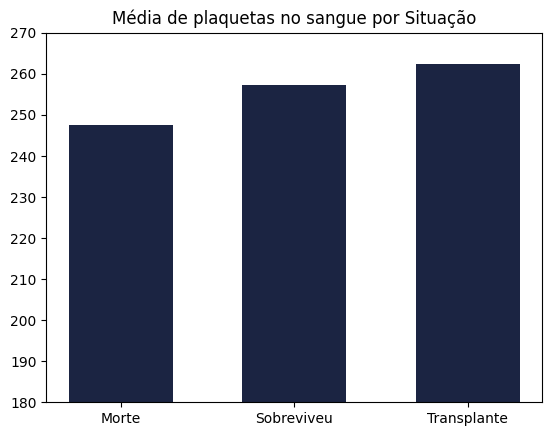

In [36]:
media_plaqueta_situacao = df.groupby('Situação')['Plaquetas(ml/1000)'].mean().reset_index()
fig, ax = plt.subplots()
ax.bar(
    media_plaqueta_situacao['Situação'], 
    media_plaqueta_situacao['Plaquetas(ml/1000)'],
    width=0.6,
    color='#1b2442'
)
ax.set_ylim([180,270]) # Definindo as extremidades dos gráficos para enfatizar as diferenças
plt.title('Média de plaquetas no sangue por Situação')
plt.show()

Os pacientes translantados apresentaram maior taxa de plaquetas após o fim do tratamento, revelando talvez, uma boa eficácia do procedimento.

Parte Luís:

In [28]:
# Função que retorna a média de determinada coluna pra cada estágio da doença
def stage_means(column):
    mean1 =  df.loc[df['Estágio'] == 1, column].mean()
    mean2 =  df.loc[df['Estágio'] == 2, column].mean()
    mean3 =  df.loc[df['Estágio'] == 3, column].mean()

    return [mean1, mean2, mean3]

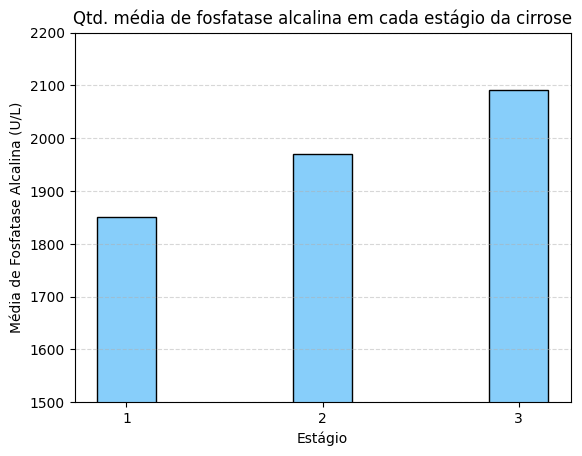

In [29]:
# Média de fosfatase alcalina por estágio
stages = ['1', '2', '3']
phosValues = stage_means('Fosfatase_Alcalina (U/L)')

plt.bar(stages, phosValues, width=0.3, edgecolor='black', color='lightskyblue')
plt.xlabel("Estágio")
plt.ylabel("Média de Fosfatase Alcalina (U/L)")
plt.title("Qtd. média de fosfatase alcalina em cada estágio da cirrose")
plt.ylim(1500, 2200)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

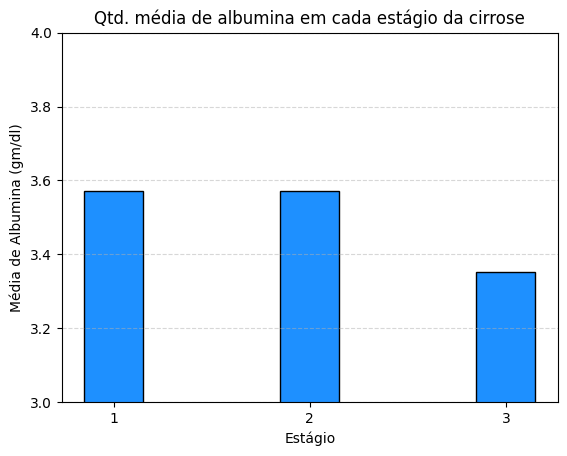

In [30]:
# Média de albumina por estágio
albValues = stage_means('Albumina(gm/dl)')

plt.bar(stages, albValues, width=0.3, edgecolor='black', color='dodgerblue')
plt.xlabel("Estágio")
plt.ylabel("Média de Albumina (gm/dl)")
plt.title("Qtd. média de albumina em cada estágio da cirrose")
plt.ylim(3, 4)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

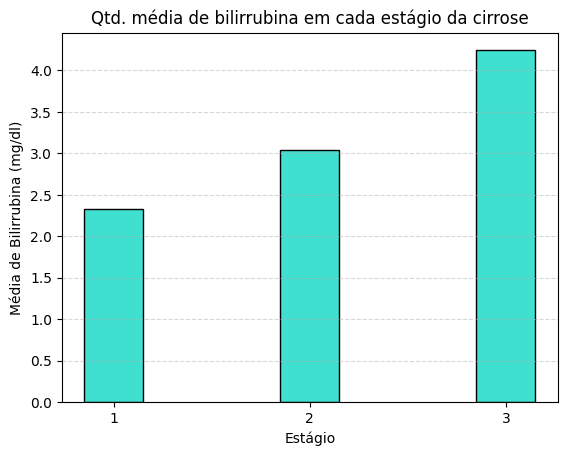

In [31]:
# Média de bilirrubina por estágio
biliValues = stage_means('Bilirrubina(mg/dl)')

plt.bar(stages, biliValues, width=0.3, edgecolor='black', color='turquoise')
plt.xlabel("Estágio")
plt.ylabel("Média de Bilirrubina (mg/dl)")
plt.title("Qtd. média de bilirrubina em cada estágio da cirrose")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

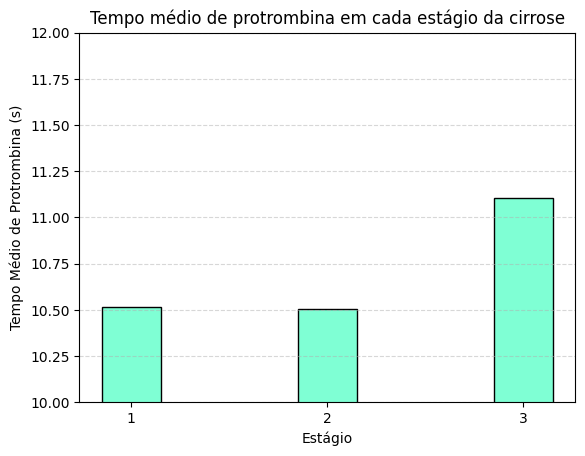

In [32]:
# Média do tempo de protrombina por estágio
protValues = stage_means('Tempo_de_Protrombina(s)')

plt.bar(stages, protValues, width=0.3, edgecolor='black', color='aquamarine')
plt.xlabel("Estágio")
plt.ylabel("Tempo Médio de Protrombina (s)")
plt.title("Tempo médio de protrombina em cada estágio da cirrose")
plt.ylim(10, 12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

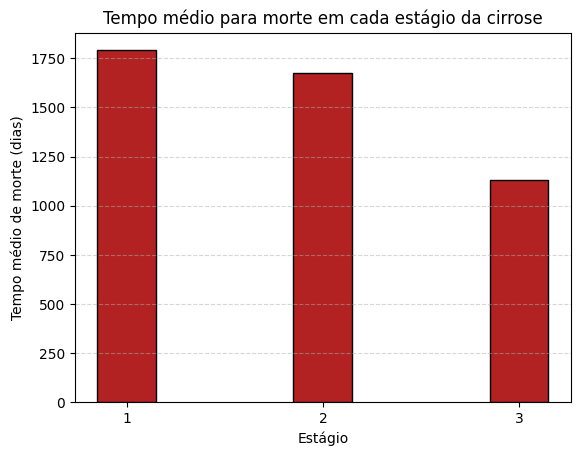

In [33]:
# Tempo médio pra morte em cada estágio
deathTime1 = df.loc[(df['Situação'] == 'Morte') & (df['Estágio'] == 1), 'Numero_dias'].mean()
deathTime2 = df.loc[(df['Situação'] == 'Morte') & (df['Estágio'] == 2), 'Numero_dias'].mean()
deathTime3 = df.loc[(df['Situação'] == 'Morte') & (df['Estágio'] == 3), 'Numero_dias'].mean()
deathValues = [deathTime1, deathTime2, deathTime3]


plt.bar(stages, deathValues, width=0.3, edgecolor='black', color='firebrick')
plt.xlabel("Estágio")
plt.ylabel("Tempo médio de morte (dias)")
plt.title("Tempo médio para morte em cada estágio da cirrose")
plt.ylim()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

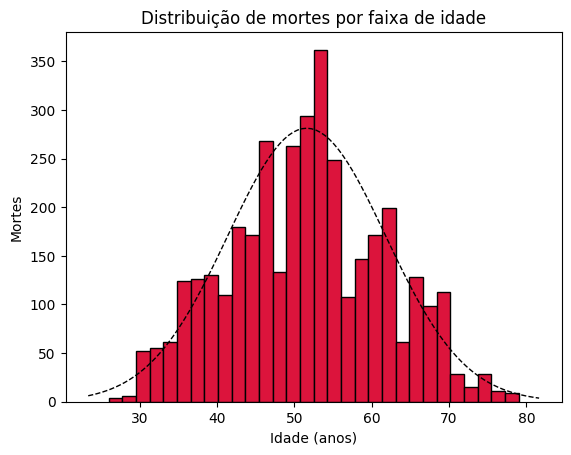

In [35]:
# Frequência de mortes por faixa de idade

# Query pra utilizar apenas as linhas onde a situação do paciente é de morte
dados_mortes = df.query('Situação == "Morte"')
ax = dados_mortes['Idade_ano'].plot(kind='hist', bins=30, color='crimson', edgecolor='black')

# Algoritmo para calcular a distribuição normal (pesquisei porque isso aqui é bruxaria)
mean = dados_mortes['Idade_ano'].mean()
std = dados_mortes['Idade_ano'].std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
bin_width = (xmax - xmin) / 30 
p = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((x - mean) / std) ** 2)
p = p * len(dados_mortes) * bin_width

plt.plot(x, p, 'k', linewidth=1, linestyle='--')
plt.title("Distribuição de mortes por faixa de idade")
plt.xlabel("Idade (anos)")
plt.ylabel("Mortes")
plt.show()